In [ ]:
# Table of Contents

# 01. Introductions
# 02. deal with missing values
# 03. Normalization
# 04. Data transformation
# 05. Feature selection
# 06. Feature reduction
# 07. Data Splits: Examples

In [ ]:
# 01. Introductions

"""
Data preprocessing may include the following operations:
- file load
- deal with missing values
- slicing data
- data normalization
- data smoothing
- data transformation, numerical to categorical
- data transformation, categorical to numerical
- feature selection
- feature deduction
- some special preprocessing, such as the operations in text mining, e.g., stopword removal, tokenization, TF-IDF weighting
"""

(30, 12)
ID                        int64
Nationality              object
Gender                    int64
Age                     float64
Degree                   object
Hours on Readings         int64
Hours on Assignments    float64
Hours on Games          float64
Hours on Internet         int64
Exam                    float64
Grade                   float64
GradeLetter              object
dtype: object
ColumnName, DataType, MissingValues
ID , int64 , False
Nationality , object , False
Gender , int64 , False
Age , float64 , True
Degree , object , False
Hours on Readings , int64 , False
Hours on Assignments , float64 , True
Hours on Games , float64 , True
Hours on Internet , int64 , False
Exam , float64 , True
Grade , float64 , True
GradeLetter , object , False


,ID,Nationality,Gender,Age,Degree,Hours on Readings,Hours on Assignments,Hours on Games,Hours on Internet,Exam,Grade,GradeLetter
0,1,China,1,23.0,PHD,9,2.0,2.0,11,81.80,79.50,B
1,2,China,1,21.0,PHD,9,2.0,2.0,11,88.96,88.46,A
2,3,China,1,24.0,PHD,9,2.0,2.0,11,88.16,87.00,B
3,4,China,1,20.0,PHD,9,2.0,2.0,11,73.57,79.70,B
4,5,China,1,22.0,PHD,9,2.0,2.0,11,78.07,78.94,C
5,6,China,1,18.0,PHD,9,2.0,2.0,11,NaN,77.78,C
6,7,China,1,25.0,PHD,9,2.0,2.0,11,77.77,70.94,C
7,8,China,1,19.0,PHD,9,2.0,2.0,11,73.95,79.26,B
8,9,China,1,25.0,PHD,9,2.0,NaN,11,73.23,75.08,C
9,10,China,1,NaN,PHD,9,2.0,2.0,11,75.60,85.81,B


C:\Users\ZHENGYONG\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\ZHENGYONG\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\ZHENGYONG\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\ZHENGYONG\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\ZHENGYONG\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\ZHENGYONG\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping de

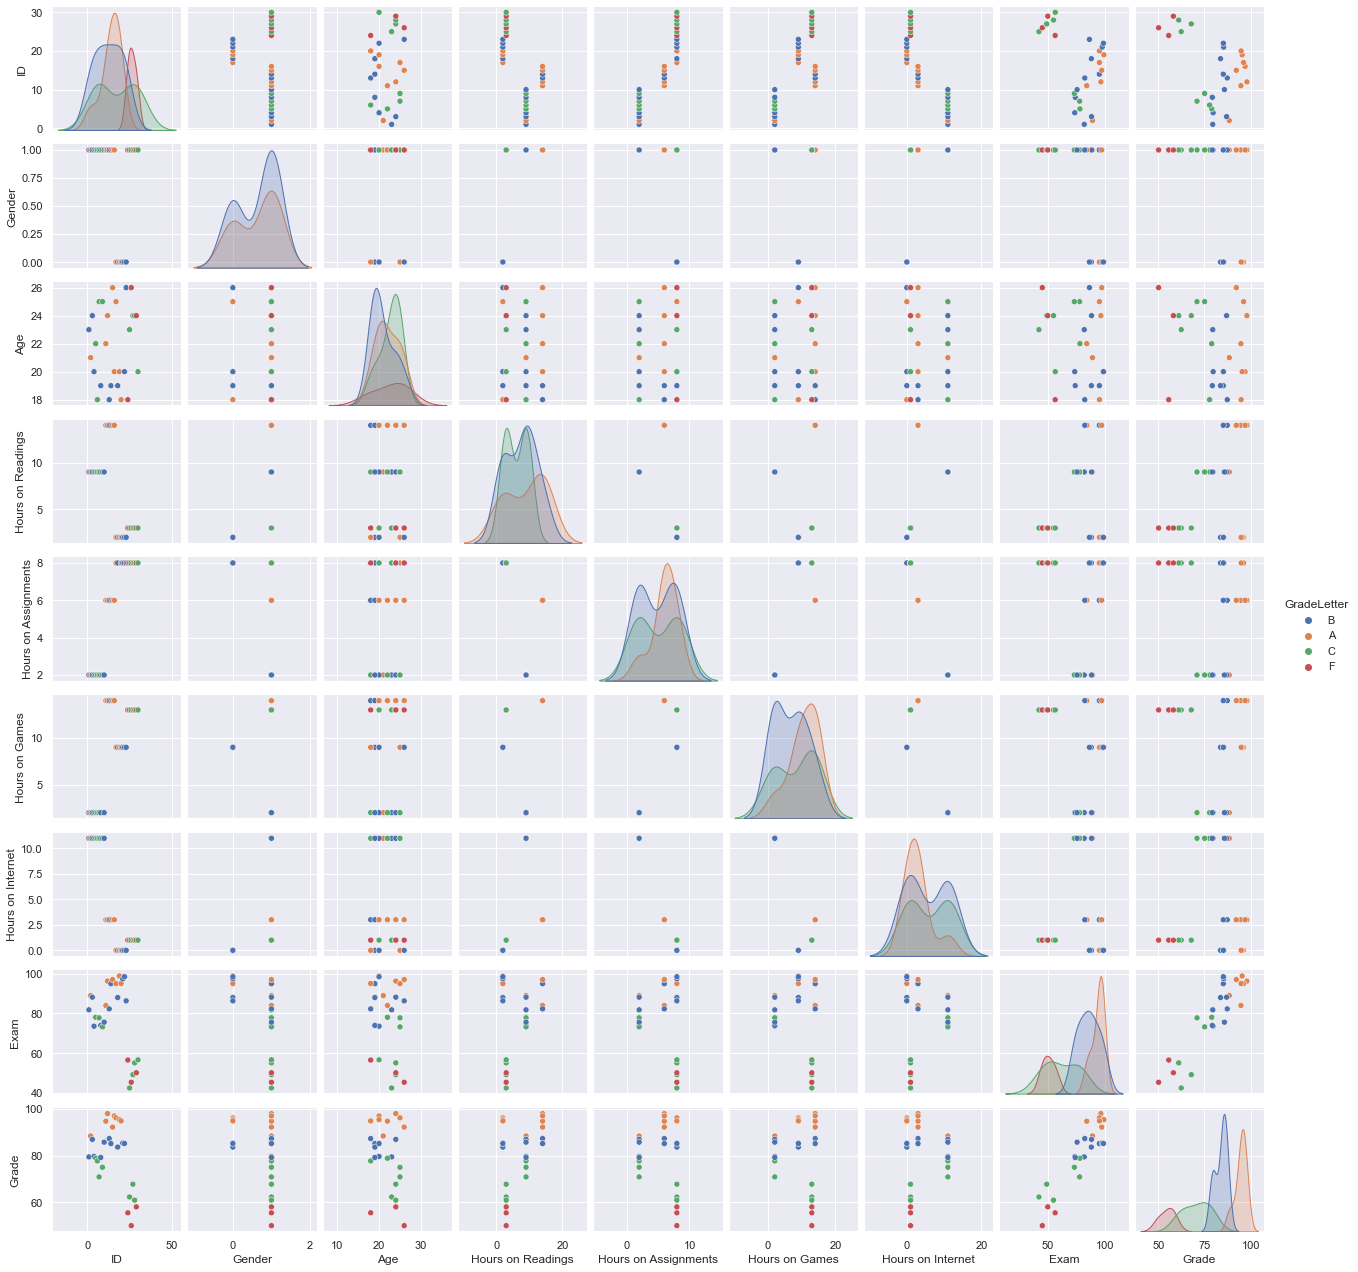

In [16]:
# the following operations will use Data_Students.csv as the data set

# 02. deal with missing values #############################################################

#Import Python Libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import seaborn as sns
from IPython.display import display, HTML

df=pd.read_csv('data_students.csv')
# get header
cols=df.columns
# get dimensions
print(df.shape)

# print header and dataType, as well as boolean value which tells missing values
print(df.dtypes)

print('ColumnName, DataType, MissingValues')
for i in cols:
    print(i, ',', df[i].dtype,',',df[i].isnull().any())

    
# print out and display dataframe as tables in HTML
display(HTML(df.head(10).to_html()))    

# By using GradeLetter as label, and visualize data
sns.set()
sns.pairplot(df, hue='GradeLetter', height=2);

In [17]:
# calculate mean value by ignoring missing values
mean_age=df['Age'].mean(skipna=True)
mean_hr_assignment=df['Hours on Assignments'].mean(skipna=True)
mean_hr_game=df['Hours on Games'].mean(skipna=True)
mean_exam=df['Exam'].mean(skipna=True)
mean_grade=df['Grade'].mean(skipna=True)

# replace missing values in numerical variables by using mean value #################################
df["Age"].fillna(df["Age"].mean(), inplace=True)
df["Hours on Assignments"].fillna(df["Hours on Assignments"].mean(), inplace=True)
df["Hours on Games"].fillna(df["Hours on Games"].mean(), inplace=True)
df["Exam"].fillna(df["Exam"].mean(), inplace=True)
df["Grade"].fillna(df["Grade"].mean(), inplace=True)

# check again whether there are missing values
print('ColumnName, DataType, MissingValues')
for i in cols:
    print(i, ',', df[i].dtype,',',df[i].isnull().any())
 
# print out and display dataframe as tables in HTML
display(HTML(df.head(10).to_html()))


# 03. Normalization ################################################################################

# find numeric columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
# get column names
cols_numeric = df.select_dtypes(include=numerics).columns.tolist()
# get column indices
cols_numeric_index=[df.columns.get_loc(col) for col in cols_numeric]
print('Numerical column names:\n',cols_numeric)
print('Numerical column indeices:\n',cols_numeric_index)

for i in cols:
    print(i, ',', df[i].dtype,',',df[i].isnull().any())
    
# create a copy first
df_norm=df.copy(deep=True)

# Normalization method 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_numeric]=scaler.fit_transform(df[cols_numeric])
display(HTML(df.head(10).to_html()))


# Normalization method 2
for col in cols_numeric:
    df_norm[col]=(df[col]-df[col].min())/(df[col].max()-df[col].min())
    
  
# drop column ID since it is not useful in data science tasks    
df_norm=df_norm.drop('ID',1)


df_norm.head(10)

ColumnName, DataType, MissingValues
ID , int64 , False
Nationality , object , False
Gender , int64 , False
Age , float64 , False
Degree , object , False
Hours on Readings , int64 , False
Hours on Assignments , float64 , False
Hours on Games , float64 , False
Hours on Internet , int64 , False
Exam , float64 , False
Grade , float64 , False
GradeLetter , object , False


,ID,Nationality,Gender,Age,Degree,Hours on Readings,Hours on Assignments,Hours on Games,Hours on Internet,Exam,Grade,GradeLetter
0,1,China,1,23.000000,PHD,9,2.0,2.000000,11,81.800000,79.50,B
1,2,China,1,21.000000,PHD,9,2.0,2.000000,11,88.960000,88.46,A
2,3,China,1,24.000000,PHD,9,2.0,2.000000,11,88.160000,87.00,B
3,4,China,1,20.000000,PHD,9,2.0,2.000000,11,73.570000,79.70,B
4,5,China,1,22.000000,PHD,9,2.0,2.000000,11,78.070000,78.94,C
5,6,China,1,18.000000,PHD,9,2.0,2.000000,11,77.860714,77.78,C
6,7,China,1,25.000000,PHD,9,2.0,2.000000,11,77.770000,70.94,C
7,8,China,1,19.000000,PHD,9,2.0,2.000000,11,73.950000,79.26,B
8,9,China,1,25.000000,PHD,9,2.0,8.827586,11,73.230000,75.08,C
9,10,China,1,21.892857,PHD,9,2.0,2.000000,11,75.600000,85.81,B


Numerical column names:
 ['ID', 'Gender', 'Age', 'Hours on Readings', 'Hours on Assignments', 'Hours on Games', 'Hours on Internet', 'Exam', 'Grade']
Numerical column indeices:
 [0, 2, 3, 5, 6, 7, 8, 9, 10]
ID , int64 , False
Nationality , object , False
Gender , int64 , False
Age , float64 , False
Degree , object , False
Hours on Readings , int64 , False
Hours on Assignments , float64 , False
Hours on Games , float64 , False
Hours on Internet , int64 , False
Exam , float64 , False
Grade , float64 , False
GradeLetter , object , False


,ID,Nationality,Gender,Age,Degree,Hours on Readings,Hours on Assignments,Hours on Games,Hours on Internet,Exam,Grade,GradeLetter
0,0.000000,China,1.0,0.625000,PHD,0.583333,0.0,0.000000,1.0,0.697621,0.613475,B
1,0.034483,China,1.0,0.375000,PHD,0.583333,0.0,0.000000,1.0,0.824751,0.800375,A
2,0.068966,China,1.0,0.750000,PHD,0.583333,0.0,0.000000,1.0,0.810547,0.769921,B
3,0.103448,China,1.0,0.250000,PHD,0.583333,0.0,0.000000,1.0,0.551491,0.617647,B
4,0.137931,China,1.0,0.500000,PHD,0.583333,0.0,0.000000,1.0,0.631392,0.601794,C
5,0.172414,China,1.0,0.000000,PHD,0.583333,0.0,0.000000,1.0,0.627676,0.577597,C
6,0.206897,China,1.0,0.875000,PHD,0.583333,0.0,0.000000,1.0,0.626065,0.434919,C
7,0.241379,China,1.0,0.125000,PHD,0.583333,0.0,0.000000,1.0,0.558239,0.608469,B
8,0.275862,China,1.0,0.875000,PHD,0.583333,0.0,0.568966,1.0,0.545455,0.521277,C
9,0.310345,China,1.0,0.486607,PHD,0.583333,0.0,0.000000,1.0,0.587536,0.745098,B


,Nationality,Gender,Age,Degree,Hours on Readings,Hours on Assignments,Hours on Games,Hours on Internet,Exam,Grade,GradeLetter
0,China,1.0,0.625000,PHD,0.583333,0.0,0.000000,1.0,0.697621,0.613475,B
1,China,1.0,0.375000,PHD,0.583333,0.0,0.000000,1.0,0.824751,0.800375,A
2,China,1.0,0.750000,PHD,0.583333,0.0,0.000000,1.0,0.810547,0.769921,B
3,China,1.0,0.250000,PHD,0.583333,0.0,0.000000,1.0,0.551491,0.617647,B
4,China,1.0,0.500000,PHD,0.583333,0.0,0.000000,1.0,0.631392,0.601794,C
5,China,1.0,0.000000,PHD,0.583333,0.0,0.000000,1.0,0.627676,0.577597,C
6,China,1.0,0.875000,PHD,0.583333,0.0,0.000000,1.0,0.626065,0.434919,C
7,China,1.0,0.125000,PHD,0.583333,0.0,0.000000,1.0,0.558239,0.608469,B
8,China,1.0,0.875000,PHD,0.583333,0.0,0.568966,1.0,0.545455,0.521277,C
9,China,1.0,0.486607,PHD,0.583333,0.0,0.000000,1.0,0.587536,0.745098,B


In [18]:
# 04. Data transformation ##########################################################
    
df_transform=df_norm.copy(deep=True)   
# print out and display dataframe as tables in HTML
display(HTML(df_transform.head(5).to_html()))

# convert numerical to categorical data, e.g., Age #################################
# df_transform['Age'] = pd.cut(df_transform['Age'],8)
# display(HTML(df_transform.head(5).to_html()))

# convert categorical data to numerical data, e.g., Degree #########################
print(df_transform['Degree'].dtype)

df_dummies_degree=pd.get_dummies(df_transform['Degree'])
print(df_dummies_degree.head(5))

# add binary variables to dataframe
df_transform=df_transform.join(df_dummies_degree)
# remove the original categorical variable
df_transform=df_transform.drop('Degree',1)
display(HTML(df_transform.head(5).to_html()))

# N-1 binary variable is enough, drop 1
df_transform=df_transform.drop(' PHD',1)

display(HTML(df_transform.head(5).to_html()))

,Nationality,Gender,Age,Degree,Hours on Readings,Hours on Assignments,Hours on Games,Hours on Internet,Exam,Grade,GradeLetter
0,China,1.0,0.625,PHD,0.583333,0.0,0.0,1.0,0.697621,0.613475,B
1,China,1.0,0.375,PHD,0.583333,0.0,0.0,1.0,0.824751,0.800375,A
2,China,1.0,0.750,PHD,0.583333,0.0,0.0,1.0,0.810547,0.769921,B
3,China,1.0,0.250,PHD,0.583333,0.0,0.0,1.0,0.551491,0.617647,B
4,China,1.0,0.500,PHD,0.583333,0.0,0.0,1.0,0.631392,0.601794,C


object
    BS   MS   PHD
0    0    0     1
1    0    0     1
2    0    0     1
3    0    0     1
4    0    0     1


,Nationality,Gender,Age,Hours on Readings,Hours on Assignments,Hours on Games,Hours on Internet,Exam,Grade,GradeLetter,BS,MS,PHD
0,China,1.0,0.625,0.583333,0.0,0.0,1.0,0.697621,0.613475,B,0,0,1
1,China,1.0,0.375,0.583333,0.0,0.0,1.0,0.824751,0.800375,A,0,0,1
2,China,1.0,0.750,0.583333,0.0,0.0,1.0,0.810547,0.769921,B,0,0,1
3,China,1.0,0.250,0.583333,0.0,0.0,1.0,0.551491,0.617647,B,0,0,1
4,China,1.0,0.500,0.583333,0.0,0.0,1.0,0.631392,0.601794,C,0,0,1


,Nationality,Gender,Age,Hours on Readings,Hours on Assignments,Hours on Games,Hours on Internet,Exam,Grade,GradeLetter,BS,MS
0,China,1.0,0.625,0.583333,0.0,0.0,1.0,0.697621,0.613475,B,0,0
1,China,1.0,0.375,0.583333,0.0,0.0,1.0,0.824751,0.800375,A,0,0
2,China,1.0,0.750,0.583333,0.0,0.0,1.0,0.810547,0.769921,B,0,0
3,China,1.0,0.250,0.583333,0.0,0.0,1.0,0.551491,0.617647,B,0,0
4,China,1.0,0.500,0.583333,0.0,0.0,1.0,0.631392,0.601794,C,0,0


,Nationality,Gender,Age,Hours on Readings,Hours on Assignments,Hours on Games,Hours on Internet,Exam,Grade,GradeLetter,BS,MS
0,China,1.0,0.625000,0.583333,0.0,0.000000,1.0,0.697621,0.613475,B,0,0
1,China,1.0,0.375000,0.583333,0.0,0.000000,1.0,0.824751,0.800375,A,0,0
2,China,1.0,0.750000,0.583333,0.0,0.000000,1.0,0.810547,0.769921,B,0,0
3,China,1.0,0.250000,0.583333,0.0,0.000000,1.0,0.551491,0.617647,B,0,0
4,China,1.0,0.500000,0.583333,0.0,0.000000,1.0,0.631392,0.601794,C,0,0
5,China,1.0,0.000000,0.583333,0.0,0.000000,1.0,0.627676,0.577597,C,0,0
6,China,1.0,0.875000,0.583333,0.0,0.000000,1.0,0.626065,0.434919,C,0,0
7,China,1.0,0.125000,0.583333,0.0,0.000000,1.0,0.558239,0.608469,B,0,0
8,China,1.0,0.875000,0.583333,0.0,0.568966,1.0,0.545455,0.521277,C,0,0
9,China,1.0,0.486607,0.583333,0.0,0.000000,1.0,0.587536,0.745098,B,0,0


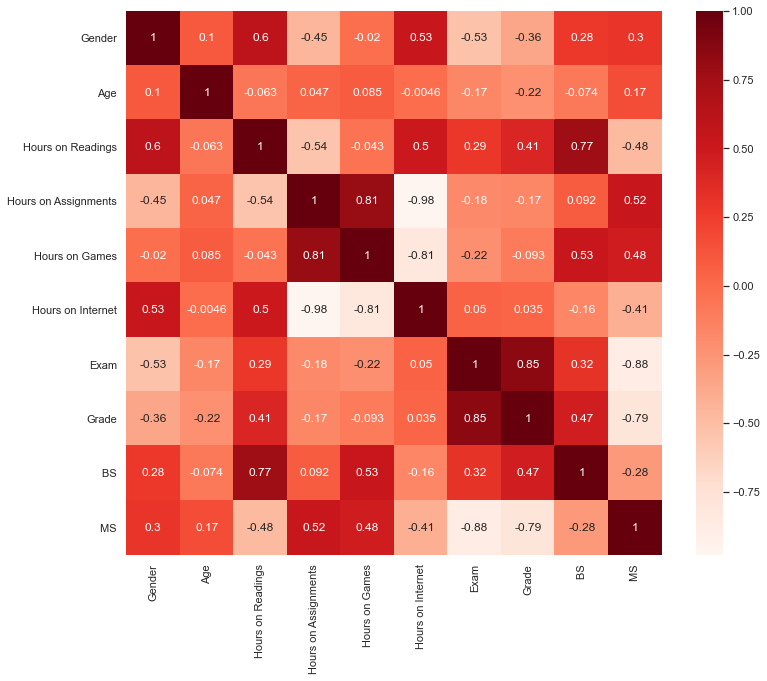


Selected features by Filter model:
 Exam     0.851830
Grade    1.000000
 MS      0.787289
Name: Grade, dtype: float64

 x variables:  ['Nationality', 'Gender', 'Age', 'Hours on Readings', 'Hours on Assignments', 'Hours on Games', 'Hours on Internet', 'Exam', 'Grade', ' BS', ' MS']


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [19]:
# 05. Feature selection #################################################################

import matplotlib.pyplot as plt

# print out and display dataframe as tables in HTML
display(HTML(df_transform.head(10).to_html()))

# set features and labels
x = df_transform.drop('GradeLetter', 1)
y = df_transform['GradeLetter']

# Feature selection by using Filter model ################################################

# by using Pearson correlation as selecting criterion
# Pearson correlation can only be applied among numerical variables
# in this data, GradeLetter is highly correlated with numerical variable Grade

# calculate correlation and show in heatmap
plt.figure(figsize=(12,10))
cor = df_transform.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

#Correlation with output variable
cor_target = abs(cor["Grade"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
print('\nSelected features by Filter model:\n',relevant_features)


# Feature selection by using Wrapper model ################################################
# A machine learning task is invovled in the Wrapper model
# We use the performance of the machine learning task to select influential features
# In this example, we use backward elimination in linear regression which predicts Grade

#Backward Elimination
import statsmodels.api as sm
cols = list(df_transform.columns)
cols.remove('GradeLetter') # drop the nominal variable
print('\n x variables: ',cols)

y=list(df_transform['Grade']) # using Grade as y variable in linear regression
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = df_transform[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print('\nSelected features by Wrapper model (regression):\n',selected_features_BE)


# Feature selection by using Wrapper model ################################################
# This example shows that we can use impurity criterion in decision trees to select important features

from sklearn.ensemble import ExtraTreesClassifier

x = df_transform.drop('GradeLetter', 1)
y = df_transform['GradeLetter']
display(HTML(x.head(10).to_html()))

model = ExtraTreesClassifier()
model.fit(x, y)

values=model.feature_importances_.tolist()
keys=x.columns.tolist()
d = dict(zip(keys, values))
# sort pairs by values descending
s = [(k, d[k]) for k in sorted(d, key=d.get, reverse=True)]


print('\nSelected features by Wrapper model (classification):\n')
for k, v in s:
    print(k,'\t',v)

In [20]:
# 06. Feature reduction #################################################################

# Example of PCA

from sklearn.decomposition import PCA


display(HTML(x.head(10).to_html()))
# convert all features to numerica, in order to apply PCA
df_dummies_nationality=pd.get_dummies(df_transform['Nationality'])
print(df_dummies_nationality.head(5))

# add binary variables to dataframe
df_transform=df_transform.join(df_dummies_nationality)
# remove the original categorical variable
df_transform=df_transform.drop('Nationality',1)
# remove on extra binary variable
df_transform=df_transform.drop(' China',1)


x = df_transform.drop('GradeLetter', 1)
y = df_transform['GradeLetter']
display(HTML(x.head(10).to_html()))

# feature extraction
pca = PCA(n_components=5)
fit = pca.fit(x)

# summarize components
# print("Explained Variance: %s") % fit.explained_variance_ratio_
print('Explained variance: ', fit.explained_variance_ratio_)
print('\nPCAs:\n', fit.components_)

# select PCA and output new features
# for example, we choose the top-3 PCAs

PCAs = pca.fit_transform(x)
PCAs_selected = PCAs[:,:3]
df_PCAs = pd.DataFrame(data=PCAs_selected, columns=['PC1','PC2','PC3'])
df_PCAs['GraderLetter']=y

display(HTML(df_PCAs.head(10).to_html()))

# write new data to external files
df_PCAs.to_csv('Data_Students_PCA.csv', sep=',')

,Nationality,Gender,Age,Hours on Readings,Hours on Assignments,Hours on Games,Hours on Internet,Exam,Grade,BS,MS
0,China,1.0,0.625000,0.583333,0.0,0.000000,1.0,0.697621,0.613475,0,0
1,China,1.0,0.375000,0.583333,0.0,0.000000,1.0,0.824751,0.800375,0,0
2,China,1.0,0.750000,0.583333,0.0,0.000000,1.0,0.810547,0.769921,0,0
3,China,1.0,0.250000,0.583333,0.0,0.000000,1.0,0.551491,0.617647,0,0
4,China,1.0,0.500000,0.583333,0.0,0.000000,1.0,0.631392,0.601794,0,0
5,China,1.0,0.000000,0.583333,0.0,0.000000,1.0,0.627676,0.577597,0,0
6,China,1.0,0.875000,0.583333,0.0,0.000000,1.0,0.626065,0.434919,0,0
7,China,1.0,0.125000,0.583333,0.0,0.000000,1.0,0.558239,0.608469,0,0
8,China,1.0,0.875000,0.583333,0.0,0.568966,1.0,0.545455,0.521277,0,0
9,China,1.0,0.486607,0.583333,0.0,0.000000,1.0,0.587536,0.745098,0,0


    China   France   Spain
0       1        0       0
1       1        0       0
2       1        0       0
3       1        0       0
4       1        0       0


,Gender,Age,Hours on Readings,Hours on Assignments,Hours on Games,Hours on Internet,Exam,Grade,BS,MS,France,Spain
0,1.0,0.625000,0.583333,0.0,0.000000,1.0,0.697621,0.613475,0,0,0,0
1,1.0,0.375000,0.583333,0.0,0.000000,1.0,0.824751,0.800375,0,0,0,0
2,1.0,0.750000,0.583333,0.0,0.000000,1.0,0.810547,0.769921,0,0,0,0
3,1.0,0.250000,0.583333,0.0,0.000000,1.0,0.551491,0.617647,0,0,0,0
4,1.0,0.500000,0.583333,0.0,0.000000,1.0,0.631392,0.601794,0,0,0,0
5,1.0,0.000000,0.583333,0.0,0.000000,1.0,0.627676,0.577597,0,0,0,0
6,1.0,0.875000,0.583333,0.0,0.000000,1.0,0.626065,0.434919,0,0,0,0
7,1.0,0.125000,0.583333,0.0,0.000000,1.0,0.558239,0.608469,0,0,0,0
8,1.0,0.875000,0.583333,0.0,0.568966,1.0,0.545455,0.521277,0,0,0,0
9,1.0,0.486607,0.583333,0.0,0.000000,1.0,0.587536,0.745098,0,0,0,0


Explained variance:  [0.37806557 0.28547831 0.26113005 0.05744864 0.00844383]

PCAs:
 [[-3.55918152e-01  1.69473659e-02 -3.81551357e-01  4.73325912e-01
   2.54778119e-01 -4.61188537e-01 -4.55818048e-02 -6.34510684e-02
  -1.42082111e-01  2.29463112e-01  3.55918152e-01 -1.42082111e-01]
 [ 1.70499281e-01 -4.17485971e-05  2.74086063e-01  2.52014591e-01
   4.58684424e-01 -2.63898121e-01  4.36998070e-03  7.09513318e-02
   5.06383739e-01  7.27301507e-02 -1.70499281e-01  5.06383739e-01]
 [ 4.02783729e-01  1.19941937e-01 -1.04673944e-01  5.07279221e-02
   9.90112089e-02  3.58158568e-02 -4.20004681e-01 -3.36210712e-01
  -1.68733212e-01  5.38651229e-01 -4.02783729e-01 -1.68733212e-01]
 [ 4.66491689e-02 -9.89554340e-01 -2.43806902e-02  1.72357820e-02
  -3.02678243e-02 -2.70557808e-02 -7.09480197e-02  6.60834237e-03
  -1.35367140e-02  9.19048159e-02 -4.66491689e-02 -1.35367140e-02]
 [ 1.57708207e-01  4.99713748e-02 -1.19706473e-01 -2.98002467e-03
  -3.13258301e-02 -6.54527166e-02  1.43495338e-01  8

,PC1,PC2,PC3,GraderLetter
0,-0.921967,-0.659294,0.041130,B
1,-0.943857,-0.645467,-0.105089,A
2,-0.934922,-0.647705,-0.043906,B
3,-0.921926,-0.659621,0.056124,B
4,-0.920325,-0.660407,0.057881,C
5,-0.927094,-0.662119,0.007606,C
6,-0.903138,-0.672286,0.161202,C
7,-0.923769,-0.660237,0.041383,B
8,-0.759984,-0.405535,0.222358,C
9,-0.927646,-0.650430,0.026514,B


In [ ]:
# 07. Data Splits: Examples

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns


# hold-out split and evaluations
# x_train, x_test, y_train, y_test = train_test_split(df, y_encoded, test_size=0.2)

# N-fold cross validation
# acc=cross_val_score(clf, x, y, cv=5, scoring='accuracy').mean()